# Title: MVP 2 HealthAccessGIS

Name- Ankila Kumari| Email - kuma0389@umn.edu

### Description
HealthAccessGIS is a Geographic Information System (GIS) tool designed to analyze and visualize healthcare accessibility within urban environments. By integrating and processing geospatial data, this MVP assists in identifying areas with limited access to healthcare facilities, thereby supporting informed decision making for urban planning and public health initiatives.

## 1. Design Framework

### 1.1. Problem Statement
Urban populations often face disparities in accessing healthcare services due to uneven distribution of facilities and varying population densities. Identifying these disparities is crucial for improving healthcare equity and planning.

### 1.2. Solution
Develop a GIS-based application that overlays population density data with healthcare facility locations to assess and visualize accessibility gaps. This tool will enable stakeholders to pinpoint underserved areas and strategize the placement of new healthcare facilities effectively.

### 1.3. Challenge
Ensuring the accuracy and consistency of diverse geospatial datasets while providing an interactive and user-friendly interface poses a significant challenge in implementing this MVP.​


___

# 2. Minimal Viable Product

## 2.1. Setup & Installation

In the code cell below, you will write all your import and load statements for the packages and data needed for your project.

In [22]:
# Import Packages
import numpy as np
import geopandas as gpd
import rasterio
from rasterio.plot import show
from rasterio.windows import Window
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import folium
from folium import Choropleth, Marker, GeoJson


## 2.2. Data IO and Processing (Functions)
Add all your data read, write, and processing functionality here.

In [34]:
# Raster processing functions
def raster_calculator_add(raster1_path, raster2_path):
    with rasterio.open(raster1_path) as r1, rasterio.open(raster2_path) as r2:
        data1 = r1.read(1)
        data2 = r2.read(1)
        return data1 + data2

def raster_calculator_max(raster1_path, raster2_path):
    with rasterio.open(raster1_path) as r1, rasterio.open(raster2_path) as r2:
        data1 = r1.read(1)
        data2 = r2.read(1)
        return np.maximum(data1, data2)

def focal_mean(raster_path):
    from scipy.ndimage import uniform_filter
    with rasterio.open(raster_path) as src:
        data = src.read(1)
        return uniform_filter(data, size=3)

def global_average(raster_path):
    with rasterio.open(raster_path) as src:
        data = src.read(1)
        return np.mean(data)

# Vector data processing functions
def find_northernmost_feature(gdf):
    northernmost = gdf.geometry.apply(lambda geom: geom.centroid.y).idxmax()
    return gdf.loc[northernmost]

def filter_features(gdf, column, threshold):
    return gdf[gdf[column] > threshold]


## 2.3. Interactivity (Functions)
Add all your user interaction functionality here. If you want to be fancy and add some improvements, then check out Box in https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Layout.html.

In [35]:
vector_dropdown = widgets.Dropdown(
    options=[('hospitals.geojson', 'data/hospitals.geojson'), 
             ('pop_density.tif)', 'data/pop_density.tif')],
    description='Vector File:',
)
vector_dropdown = widgets.Dropdown(
    options=[('hospitals.geojson', 'hospitals.geojson'), 
             ('pop_density.tif', 'pop_density.tif')],
    description='Vector File:',
)

raster_dropdown = widgets.Dropdown(
    options=[('Population Density (tif)', 'pop_density.tif'), 
             ('Elevation (asc)', 'elevation.asc')],
    description='Raster File:',
)

raster_dropdown
vector_dropdown


Dropdown(description='Vector File:', options=(('hospitals.geojson', 'hospitals.geojson'), ('pop_density.tif', …

## 2.4. Execution
### 2.4.1. Run <code>main</code>
The code cell(s) below are meant for your exection of your project objective (serving as your MVP). Remember, it should be simple.

Welcome to my GIS MVP titled HealthAccessGIS
This GIS MVP is authored by Swetabh Patel


Raster file selected: pop_density.tif
Vector file selected: hospitals.geojson
Global average raster value: 53.560001373291016


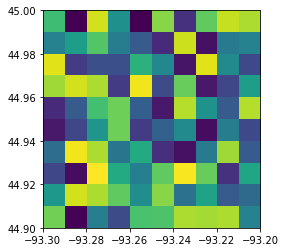

/tmp/ipykernel_730/4201354286.py:25: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]
/tmp/ipykernel_730/4201354286.py:25: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]


In [53]:
def print_welcome():    
    print("Welcome to my GIS MVP titled HealthAccessGIS")
    print("This GIS MVP is authored by Swetabh Patel")
    print("\n")

def main():
    print_welcome()
    
    raster1 = raster_dropdown.value
    vector1 = vector_dropdown.value
    
    print("Raster file selected:", raster1)
    print("Vector file selected:", vector1)
    
    # Example global average calculation
    avg = global_average(raster1)
    print(f"Global average raster value: {avg}")

    # Display raster
    with rasterio.open(raster1) as src:
        show(src)

    # Display vector on map
    gdf = gpd.read_file(vector1)
    center = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]
    m = folium.Map(location=center, zoom_start=12)
    folium.GeoJson(gdf).add_to(m)
    display(m)

main()


## 2.5. Rationale
Why is this an MVP for a GIS?

Insert your 2-3 sentence answer here

In [ ]:
This MVP exemplifies a GIS application by integrating raster and vector data to analyze and visualize healthcare accessibility. It provides essential functionalities such as data reading, processing, and interactive mapping, serving as a foundational tool for identifying and addressing disparities in healthcare access within urban areas.​